<a href="https://colab.research.google.com/github/hsiaopray/class/blob/master/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from tensorflow.keras.datasets.mnist import  load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()


In [24]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


ans: 5


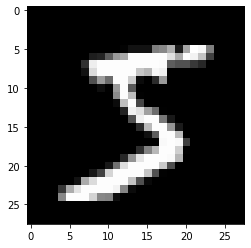

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
idx = 0
print("ans:", y_train[idx])
plt.imshow(x_train[idx], cmap="gray")

In [26]:
import pandas as pd
pd.DataFrame(x_train[idx])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
          # 784 * 128 + 128(bias)
          Dense(128, activation="relu", input_dim=784),
          # 128 * 10 +10(bias)
          Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Loss函數 Categorical Cross Entropy
# 局部最佳化 ADAM
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=CategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [29]:
# 把答案變成字串模式
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train_cat[0])
print(y_test_cat[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [30]:
# 盡量把資料放進0-1之間
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255

In [31]:
# ModelCheckpoint 儲存最佳模型
# EarlyStopping 找到最佳解時停下
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
save_callback = ModelCheckpoint("mnist.h5", save_best_only=True)
stop_callback = EarlyStopping(patience=5, restore_best_weights=True)
# batch_size: 看幾筆再做一次梯度(平均)下降[20-200]
# validation_split: 切出一部分資料來驗證模型好壞
# epoch: 整份資料要看幾輪
# verbose: 2 不要進度條
model.fit(x_train_norm, 
     y_train_cat,
     batch_size=200,
     validation_split=0.1,
     epochs=50,
     verbose=2,
     callbacks=[stop_callback, save_callback])

Epoch 1/50
270/270 - 1s - loss: 0.4398 - accuracy: 0.8840 - val_loss: 0.1876 - val_accuracy: 0.9500
Epoch 2/50
270/270 - 1s - loss: 0.1930 - accuracy: 0.9444 - val_loss: 0.1434 - val_accuracy: 0.9613
Epoch 3/50
270/270 - 1s - loss: 0.1411 - accuracy: 0.9596 - val_loss: 0.1162 - val_accuracy: 0.9690
Epoch 4/50
270/270 - 1s - loss: 0.1111 - accuracy: 0.9680 - val_loss: 0.0991 - val_accuracy: 0.9742
Epoch 5/50
270/270 - 1s - loss: 0.0903 - accuracy: 0.9744 - val_loss: 0.0929 - val_accuracy: 0.9748
Epoch 6/50
270/270 - 1s - loss: 0.0758 - accuracy: 0.9787 - val_loss: 0.0884 - val_accuracy: 0.9758
Epoch 7/50
270/270 - 1s - loss: 0.0636 - accuracy: 0.9822 - val_loss: 0.0787 - val_accuracy: 0.9790
Epoch 8/50
270/270 - 1s - loss: 0.0549 - accuracy: 0.9852 - val_loss: 0.0782 - val_accuracy: 0.9787
Epoch 9/50
270/270 - 1s - loss: 0.0478 - accuracy: 0.9866 - val_loss: 0.0747 - val_accuracy: 0.9785
Epoch 10/50
270/270 - 1s - loss: 0.0408 - accuracy: 0.9889 - val_loss: 0.0724 - val_accuracy: 0.9800

In [32]:
# 模型評估
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0720 - accuracy: 0.9782


[0.07196901738643646, 0.9782000184059143]

In [34]:
# 將上面最做好且儲存好的模型數據拿來用
# mode.save("mlp.h5")
from tensorflow.keras.models import load_model
loaded = load_model("mnist.h5")
# 不需要compile 可以 fit/evaluate/predict
loaded.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 881us/step - loss: 0.0720 - accuracy: 0.9782


[0.07196901738643646, 0.9782000184059143]

In [36]:
# sklearn: predict(預測類別) predict_proba(預測機率)
# tensorflow: predict_classes(預測類別) predict(預測機率)
pre = model.predict_classes(x_test_norm)
pre

array([7, 2, 1, ..., 4, 5, 6])

In [38]:
import pandas as pd
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre),
      index=["{}(真實)".format(i) for i in range(10)],
      columns=["{}(預測)".format(i) for i in range(10)])

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(真實),969,0,1,1,1,1,2,1,2,2
1(真實),0,1124,4,1,0,0,2,1,3,0
2(真實),4,1,1008,2,1,0,3,6,5,2
3(真實),0,1,3,993,0,1,1,3,3,5
4(真實),1,0,2,1,962,0,5,3,1,7
5(真實),3,0,0,11,1,864,4,3,2,4
6(真實),6,2,0,1,5,5,937,1,1,0
7(真實),0,4,8,2,0,1,0,1008,0,5
8(真實),4,0,6,7,5,5,2,5,938,2
9(真實),1,4,0,2,9,5,0,7,2,979


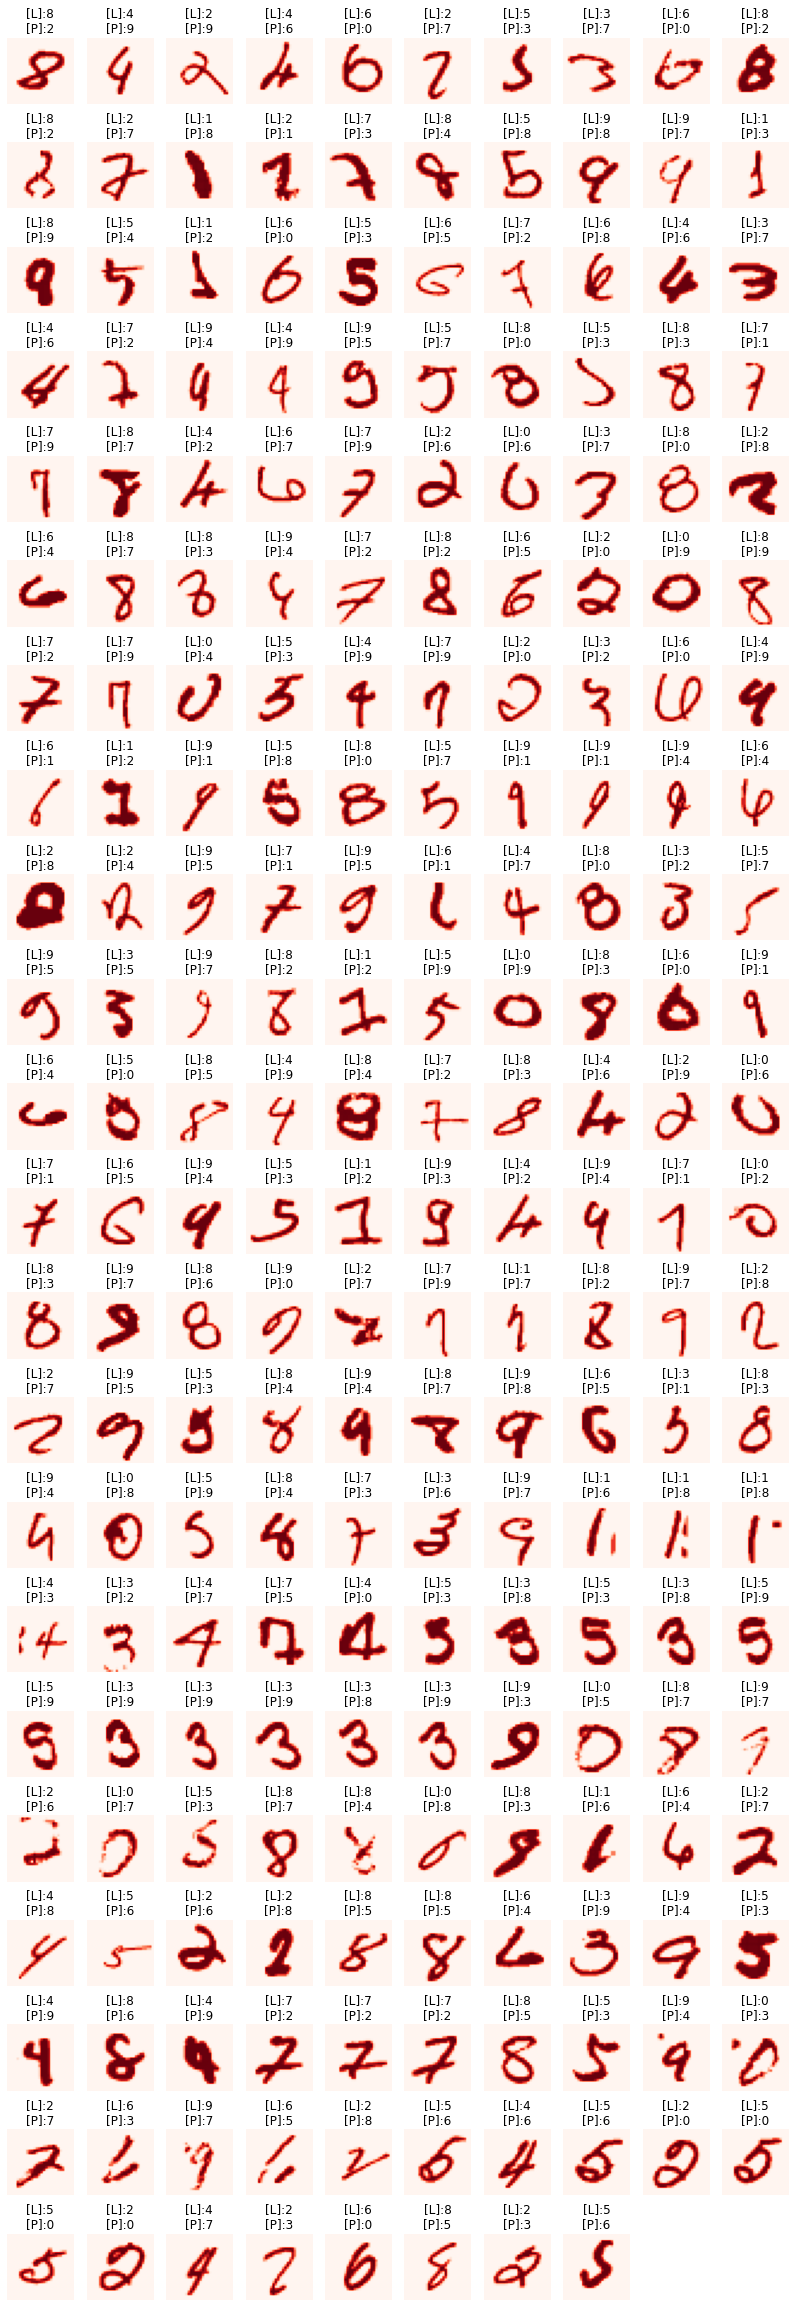

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14, 42))
idx = np.nonzero(pre != y_test)[0]
width = 10
height = len(idx) // width + 1
for i, d  in enumerate(idx):
    img, label, p = x_test[d], y_test[d], pre[d]
    t = "[L]:{}\n[P]:{}".format(label, p)
    plt.subplot(height, width, i+1)
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="Reds")

檔名: test.png
0 的機率: 0.0
1 的機率: 0.0
2 的機率: 0.31
3 的機率: 0.0
4 的機率: 0.0
5 的機率: 0.69
6 的機率: 0.0
7 的機率: 0.0
8 的機率: 0.0
9 的機率: 0.0


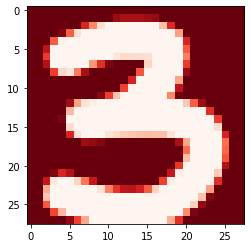

In [46]:
# 自己寫個數字給模型預測
from tensorflow.keras.preprocessing.image import load_img
fn = input("檔名: ")
# .convert 顏色轉換
img = load_img(fn, target_size=(28, 28)).convert("L")
img_np = np.array(img).reshape(1, 784) / 255

pre = model.predict(img_np)[0]
# round(pre[i], 2) pre[i]: 是i的機率有多少， round(x, 2): 顯示x的小數點後兩位
for i in range(10):
    print(i, "的機率:", round(pre[i], 2))
plt.imshow(np.array(img), cmap="Reds")